In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [76]:
train_df = pd.read_csv("resources/train_data.csv", low_memory=False)

# Exploratory Data Analysis

## General Description

In [4]:
print(train_df.shape)
train_df.head()

(593471, 33)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [5]:
print(train_df.dtypes)
train_df.dtypes.value_counts()

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

object     21
float64    11
int64       1
Name: count, dtype: int64

In [6]:
train_df.duplicated().sum()

0

In [90]:
pd.DataFrame(train_df.isna().sum()).rename(columns={0: "Missing Values"})

,Missing Values
Accident Date,23134
Age at Injury,19445
Alternative Dispute Resolution,19445
Assembly Date,0
Attorney/Representative,19445
Average Weekly Wage,48096
Birth Year,48523
C-2 Date,34005
C-3 Date,406226
Carrier Name,19445


## Univariate Analysis

In [20]:
train_df["Accident Date"].apply(
    lambda x: x.split("-")[1] if pd.notnull(x) else x
).value_counts()

Accident Date
03    51063
10    49554
01    49431
09    48996
08    48950
07    48919
02    48295
06    47976
12    47661
11    44759
05    42831
04    41902
Name: count, dtype: int64

In [43]:
a = (
    train_df["Accident Date"]
    .apply(lambda x: x.split("-")[0] if pd.notnull(x) else x)
    .value_counts()
    .sort_index(ascending=True)
)

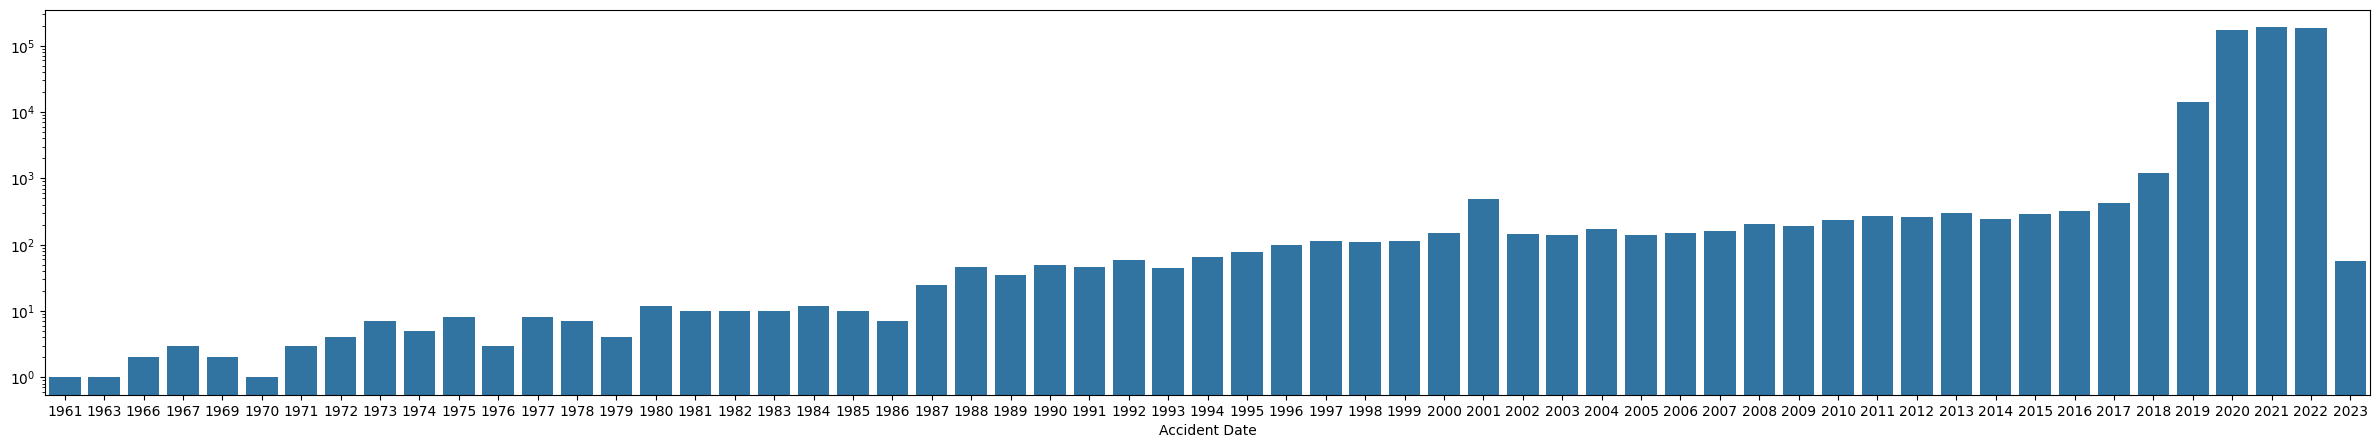

In [66]:
plt.figure(figsize=(30, 5))
sns.barplot(x=a.index, y=a.values)
plt.yscale("log")

In [61]:
filtered_df = train_df[
    train_df["Accident Date"].apply(
        lambda x: int(x.split("-")[0]) if pd.notnull(x) else None
    )
    == 2023
]

filtered_df["Accident Date"].apply(
    lambda x: int(x.split("-")[1]) if pd.notnull(x) else None
).value_counts().sort_index(ascending=True)

Accident Date
1    16
2     8
3     9
4     8
5     7
6     1
7     1
8     3
9     3
Name: count, dtype: int64

In [59]:
train_df["Accident Date"].apply(
    lambda x: x.split("-")[0] if pd.notnull(x) else x
).value_counts().sort_index(ascending=True)

Accident Date
1961         1
1963         1
1966         2
1967         3
1969         2
1970         1
1971         3
1972         4
1973         7
1974         5
1975         8
1976         3
1977         8
1978         7
1979         4
1980        12
1981        10
1982        10
1983        10
1984        12
1985        10
1986         7
1987        25
1988        46
1989        35
1990        49
1991        46
1992        59
1993        44
1994        65
1995        77
1996       100
1997       112
1998       111
1999       112
2000       148
2001       491
2002       143
2003       138
2004       174
2005       139
2006       149
2007       162
2008       203
2009       190
2010       236
2011       268
2012       263
2013       295
2014       247
2015       290
2016       318
2017       418
2018      1211
2019     14301
2020    173744
2021    189803
2022    185939
2023        56
Name: count, dtype: int64

In [110]:
train_df["Claim Injury Type"].value_counts().sort_index(ascending=True)

Claim Injury Type
1. CANCELLED        12477
2. NON-COMP        291078
3. MED ONLY         68906
4. TEMPORARY       148507
5. PPD SCH LOSS     48280
6. PPD NSL           4211
7. PTD                 97
8. DEATH              470
Name: count, dtype: int64